# **Laboratorio 1**

**Integrantes**


**Estudiante 1:** 
Sebastian Contreras Salazar - 202020903

**Estudiante 2:**
Juan Miguel Manrique - 202021447

**Estudiante 3:**
Andres

# **Carga de datos**

Como primer paso de este laboratorio, se requiere cargar los datos:

In [127]:
# Imports
!pip install matplotlib seaborn scikit-learn scipy pandas numpy joblib
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re
from joblib import dump, load

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats


Ahora cargamos los datos correspondientes:

In [68]:
#Carga de de datos
datos_entrenamiento = pd.read_csv('data/datos_entrenamiento_laboratorio1(train_data).csv')
datos_validacion = pd.read_csv('data/datos_validacion_laboratorio1(test_data).csv')

Revisamos las dimensiones:

In [69]:
#Dimensiones
datos_entrenamiento.shape

(57934, 50)

Miramos los primeros datos:

In [70]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,...,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,...,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,...,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


Con esto en cuenta podemos proceder a entender y visualizar los datos.

## **Entendimiento y visualización de los Datos**

1. Explorar los datos:

In [71]:
# Información general y tipos de datos
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57934 entries, 0 to 57933
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         57934 non-null  object 
 1   Nacionalidad                    57902 non-null  object 
 2   Posicion                        57934 non-null  object 
 3   Edad                            57886 non-null  object 
 4   Dia_partido                     57934 non-null  object 
 5   Goles                           57934 non-null  int64  
 6   Tiros Totales                   57934 non-null  int64  
 7   xG                              57934 non-null  float64
 8   npxG                            57934 non-null  float64
 9   xAG                             57934 non-null  float64
 10  xAG.1                           57934 non-null  float64
 11  Acciones_que_crean_tiros        57934 non-null  int64  
 12  Pases_intentados                

Con esto, tambien podemos mirar las estadísticas descriptivas:

In [72]:

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,57934,57902,57934,57886,57934,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,...,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000,45040,45018
unique,2242,110,452,7114,198,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,11
top,Vitinha,fr FRA,CB,24-231,"Saturday May 10, 2025",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€5.00m,30.06.2028
freq,166,9351,9537,37,997,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2332,11316
mean,NaN,NaN,NaN,NaN,NaN,0.513015,0.792402,0.088635,0.080473,0.062784,...,0.950133,0.574033,25.518383,2.382470,0.781337,1.133652,0.834795,48.814187,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,16.440600,1.158538,0.209810,0.186549,0.152033,...,1.221368,0.931852,19.001270,3.158174,1.005105,2.005869,1.305149,39.560765,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.100000,0.100000,0.100000,...,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,1.000000,100.000000,NaN,NaN


Con describe podemos ver las variables que existen y las primeras estadisticas para conocer como los datos estan presentes. Estas son algunos datos que podemos sacar a partir de lo obtenido:
## Análisis y conclusiones relevantes sobre los datos

- **Cantidad de registros:** El dataset cuenta con 47,451 registros, representando múltiples partidos y jugadores.
- **Jugadores únicos:** Hay 2,242 jugadores diferentes, lo que indica una buena diversidad de la muestra.
- **Nacionalidades:** Se identifican 110 nacionalidades distintas, mostrando diversidad internacional.
- **Posiciones:** Existen 452 valores únicos en la columna de posición, lo que puede deberse a combinaciones de roles o errores de captura.
- **Edad:** La edad de los jugadores varía entre 16 y 42 años, con una media de 26 años, lo que es consistente con la edad típica de futbolistas profesionales.
- **Goles y tiros:** El promedio de goles por registro es bajo (0.6), lo que es esperable dado que la mayoría de partidos tienen pocos goles por jugador. El máximo de goles en un registro es 995, lo que sugiere posibles errores o registros acumulados.
- **Métricas avanzadas:** Las variables como xG, npxG, xA y PSxG tienen medias bajas, lo que es coherente con su interpretación como probabilidades o expectativas por partido.
- **Pases y acciones:** El número de pases intentados y completados varía ampliamente, con valores máximos altos que pueden indicar partidos con mucha participación o errores de captura.
- **Porcentajes:** Los porcentajes de regates exitosos y duelos aéreos ganados tienen valores entre 0 y 100, aunque hay que revisar los valores negativos o superiores a 100 que podrían indicar errores.
- **Valores nulos:** Algunas columnas presentan valores nulos, especialmente en métricas avanzadas y porcentajes, lo que debe ser tratado antes del modelado.
- **Valor de mercado:** El valor de mercado (`market_value`) tiene una media de aproximadamente 31 millones de euros, pero con una desviación estándar muy alta y valores máximos que llegan hasta casi 10 mil millones, lo que sugiere la presencia de outliers o errores de captura.
- **Fechas:** Hay 198 fechas de partido únicas y 11 fechas de contrato diferentes, lo que puede ayudar a analizar la evolución temporal de los jugadores.

### Datos a tener en cuenta:

- El dataset es amplio y diverso, lo que es positivo para el modelado.
- Existen posibles errores o outliers en variables como goles, valor de mercado y porcentajes, que deben ser revisados y tratados.
- Hay columnas con valores nulos que requieren imputación o eliminación según su importancia.
- La variedad de posiciones y nacionalidades permitirá analizar el impacto de estas variables en el valor de mercado.
- Es recomendable realizar una limpieza adicional para asegurar la calidad de los datos antes de construir el modelo de regresión.

Teniendo esto en cuenta, también podemos mirar las columnas que tenemos presentes en el dataset:

In [73]:
datos_entrenamiento.columns

Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'Goles',
       'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1',
       'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1',
       'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados',
       'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto',
       'Pases_al_hueco', 'Pases_centros', 'Pases_completados',
       'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego',
       'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro',
       'Toques_en_zona_ofensiva', 'Toques_en_area_rival',
       '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate',
       'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon',
       'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas',
       'Centros', 'Duelos_aereos_ganad

Y ahora podemos sacar un diccionario por cada columna, que no se repiten, respectivamente:

| Columna                         | Tipo         | Descripción                                                                 |
|----------------------------------|--------------|-----------------------------------------------------------------------------|
| Jugador                         | Texto        | Nombre del jugador de fútbol.                                               |
| Nacionalidad                    | Texto        | País de origen del jugador.                                                 |
| Posicion                        | Texto        | Posición en el campo (ej. Defensa, Delantero, Portero).                     |
| Edad                            | Entero       | Edad del jugador en años.                                                   |
| Dia_partido                     | Fecha/Text   | Día en que se disputó el partido.                                           |
| Goles                           | Entero       | Número de goles anotados en el partido.                                     |
| Tiros Totales                   | Entero       | Total de tiros intentados (a puerta + fuera).                               |
| xG                              | Float        | Goles esperados (Expected Goals).                                           |
| npxG                            | Float        | Goles esperados sin penales.                                                |
| xAG                             | Float        | Asistencias de goles esperadas (Expected Assisted Goals).                   |
| Acciones_que_crean_tiros        | Entero       | Acciones del jugador que generaron un tiro.                                 |
| Pases_intentados                | Entero       | Número total de pases intentados.                                           |
| Pases_progresivos               | Entero       | Pases que avanzaron significativamente el balón hacia la portería rival.    |
| Regates_exitosos                | Entero       | Número de regates completados con éxito.                                    |
| Pases_medios_completados        | Entero       | Pases completados a distancia media (10–30m).                               |
| Pases_largos_completados        | Entero       | Pases largos completados (>30m).                                            |
| xA                              | Float        | Asistencias esperadas (Expected Assists).                                   |
| Pases_en_ultimo_tercio          | Entero       | Pases completados en el último tercio del campo.                            |
| Pases_balon_vivo                | Entero       | Pases realizados con balón en movimiento.                                   |
| Pases_balon_muerto              | Entero       | Pases realizados en jugadas a balón parado (ej. córners, tiros libres).     |
| Pases_al_hueco                  | Entero       | Pases filtrados entre defensores.                                           |
| Pases_centros                   | Entero       | Centros realizados al área rival.                                           |
| Pases_completados               | Entero       | Total de pases completados.                                                 |
| Pases_fuera_de_juego            | Entero       | Pases que resultaron en fuera de juego.                                     |
| Valla_no_vencida                | Entero       | Número de veces que el portero mantuvo la portería en cero.                 |
| Errores_defnsivos_ocasion_tiro  | Entero       | Errores defensivos que ocasionaron un tiro rival.                           |
| Toques_en_zona_ofensiva         | Entero       | Número de toques del jugador en campo rival.                                |
| Toques_en_area_rival            | Entero       | Toques del jugador dentro del área rival.                                   |
| %_de_regates_exitosos           | Float (%)    | Porcentaje de regates completados con éxito.                                |
| Veces_que_fue_barrido_regate    | Entero       | Veces que el jugador fue barrido mientras intentaba un regate.              |
| Acarreos_ultimo_tercio          | Entero       | Conducciones de balón que llegaron al último tercio del campo.              |
| Malos_controles                 | Entero       | Veces que el jugador perdió control del balón.                              |
| Perdida_balon                   | Entero       | Veces que el jugador perdió posesión.                                       |
| Pases_recibidos                 | Entero       | Número de pases recibidos por el jugador.                                   |
| Pases_progresivos_recibidos     | Entero       | Pases recibidos que avanzaron significativamente hacia la portería rival.   |
| Faltas_cometidas                | Entero       | Faltas cometidas por el jugador.                                            |
| Centros                         | Entero       | Centros realizados al área rival.                                           |
| Duelos_aereos_ganados           | Entero       | Duelos aéreos que el jugador ganó.                                          |
| %_de_duelos_aereos_ganados      | Float (%)    | Porcentaje de duelos aéreos ganados.                                        |
| market_value                    | Float (€)    | Valor estimado de mercado del jugador en euros.                             |
| contract_date                   | Fecha        | Fecha de finalización del contrato del jugador.                             |

Con esto, es posible ya tener un entendimiento claro de los datos, y se puede proceder a realizar el análisis de la calidad de los datos.

### Completitud

Vamos a comenzar con la completitud de los datos, los cuales revisaremos las dimensiones de la calidad de los datos, revisando la existencia o no de un dato según un criterio. Para estos casos, revisaremos los datos si son nulos/faltantes.

In [74]:
#Revisamos las dimensiones
datos_entrenamiento.shape

(57934, 50)

Revisamos que datos existen que sean nulos:

In [75]:
(datos_entrenamiento.isnull().sum() / datos_entrenamiento.shape[0]).sort_values(ascending=False)

%_de_regates_exitosos             0.495771
%_de_duelos_aereos_ganados        0.361739
contract_date                     0.222943
market_value                      0.222564
Edad                              0.000829
Nacionalidad                      0.000552
Jugador                           0.000000
Posicion                          0.000000
Dia_partido                       0.000000
Goles                             0.000000
xAG.1                             0.000000
Acciones_que_crean_tiros          0.000000
Pases_intentados                  0.000000
Pases_intentados.1                0.000000
Tiros Totales                     0.000000
xG                                0.000000
npxG                              0.000000
xAG                               0.000000
Regates_exitosos                  0.000000
Pases_progresivos.1               0.000000
Pases_progresivos                 0.000000
Pases_intentados.2                0.000000
Regates_exitosos.1                0.000000
Pases_medio

Con esta información podemos identificar los siguientes elementos: %_de_regates_exitosos             0.495771
%_de_duelos_aereos_ganados        0.361739
contract_date                     0.222943
market_value                      0.222564
Edad                              0.000829
Nacionalidad                      0.000552
Los cuales son el panorama de porcentaje de los nulos. Como podemos observar, los porcentajes de Edad y Nacionalidad son pequeños, pero son datos relevantes, por lo cual se van a eliminar esas filas. Por otro lado, para contract_date y market_value, dado que podrian afectar el resto de los datos, si los reemplazamos con datos incorrectos o nuevos, podrian afectar el modelo, por lo cual vamos a buscar datos que puedan reemplazarse en ellos, siendo estos, si se encuentra algo de estos jugadores, los valores máximos. Ahora bien, para las columnas con muchos nulos que equivale a los porcentajes de regates exitosos y de duelos aereos ganados, vamos a agrupar por jugador, donde calcularemos el promedio de ese jugador en esos porcentajes con los datos que si tiene para rellenar sus valores faltantes con ese promedio. Sin embargo, si no tiene ningun dato, se elimina. Con todo lo dicho previamente, primero vamos a realizar la agrupación y solución propuesta para columnas numericas criticas como los porcentajes y mercado de valores, si despues de hacer lo dicho siguen en nulos, se eliminan. Esto último se debe a que, al no poder conseguir mayor información y datos, y no encontrar rasgos generales ni estadisticas del jugador, se procede a eliminarlos.

In [76]:
cols_a_imputar = ["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"]

# Asegurar numéricas
for col in cols_a_imputar:
    datos_entrenamiento[col] = pd.to_numeric(datos_entrenamiento[col], errors="coerce")

# 1) Porcentajes: llenar NaN con el PROMEDIO por Jugador
percent_cols = ["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"]
for col in percent_cols:
    mean_by_player = datos_entrenamiento.groupby("Jugador")[col].transform("mean")
    mask = datos_entrenamiento[col].isna()
    datos_entrenamiento.loc[mask, col] = mean_by_player[mask]
datos_entrenamiento = datos_entrenamiento.dropna(subset=cols_a_imputar)

Revisamos como van los datos en cuanto a nulidad:

In [77]:
(datos_entrenamiento.isnull().sum() / datos_entrenamiento.shape[0]).sort_values(ascending=False)

contract_date                     0.220639
market_value                      0.220269
Edad                              0.000776
Nacionalidad                      0.000444
Jugador                           0.000000
Posicion                          0.000000
Tiros Totales                     0.000000
xG                                0.000000
Dia_partido                       0.000000
Goles                             0.000000
xAG.1                             0.000000
Acciones_que_crean_tiros          0.000000
Pases_intentados                  0.000000
Pases_intentados.1                0.000000
Pases_intentados.2                0.000000
Pases_progresivos                 0.000000
npxG                              0.000000
xAG                               0.000000
Regates_exitosos                  0.000000
Pases_progresivos.1               0.000000
Regates_exitosos.1                0.000000
Pases_medios_completados          0.000000
xAG.3                             0.000000
xA         

Procedemos a realizar ahora la completitud de contract_date, donde se usara los datos de jugador y nacionalidad para buscar los contract_date de cada jugador. Si no se encuentran despues de eso, se eliminan. Esto se debe a que pueden existir jugadores que repitan nombres o paises, por lo que con ambos podemos agruparlos mejor:

In [78]:
col_cd = "contract_date"

# Tratar vacíos como NaN (sin tocar otras columnas)
datos_entrenamiento[col_cd] = datos_entrenamiento[col_cd].replace(r'^\s*$', np.nan, regex=True)

# Valor representativo por grupo (modo; si no hay no-nulos, queda NaN)
rep_by_group = datos_entrenamiento.groupby(["Jugador", "Nacionalidad"])[col_cd] \
    .transform(lambda s: s.dropna().mode().iloc[0] if s.dropna().size else np.nan)

# Rellenar SOLO donde está NaN
mask_cd = datos_entrenamiento[col_cd].isna()
datos_entrenamiento.loc[mask_cd, col_cd] = rep_by_group[mask_cd]

# Eliminar filas que aún queden sin contract_date
datos_entrenamiento = datos_entrenamiento.dropna(subset=[col_cd])


Revisamos:

In [79]:
(datos_entrenamiento.isnull().sum() / datos_entrenamiento.shape[0]).sort_values(ascending=False)

Nacionalidad                      0.000403
Edad                              0.000403
Jugador                           0.000000
Posicion                          0.000000
Dia_partido                       0.000000
Goles                             0.000000
Tiros Totales                     0.000000
xG                                0.000000
npxG                              0.000000
xAG                               0.000000
xAG.1                             0.000000
Acciones_que_crean_tiros          0.000000
Pases_intentados                  0.000000
Pases_intentados.1                0.000000
Pases_intentados.2                0.000000
Pases_progresivos                 0.000000
Pases_progresivos.1               0.000000
Regates_exitosos                  0.000000
Regates_exitosos.1                0.000000
Pases_medios_completados          0.000000
Pases_largos_completados          0.000000
xAG.2                             0.000000
xAG.3                             0.000000
xA         

Como se observa, tambien eliminamos los nulos de market_value, pues los que se encontraron, que no tienen contrato, no tienen ningun dato de market value. Ahora, nos quedan nulos en nacionalidad y edad, respectivamente, por lo cual los eliminamos, dado que hay jugadores que pueden repetir nombres y/o nacionalidad, y compartan mismas estadisticas que otros jugadores, respectivamente. Por lo tanto, encontrarlos seria dificil y el porcentaje de nulos que tienen es considerablemente bajo.

In [80]:
datos_entrenamiento = datos_entrenamiento.dropna(subset=["Edad", "Nacionalidad"])

Revisamos:

In [81]:
(datos_entrenamiento.isnull().sum() / datos_entrenamiento.shape[0]).sort_values(ascending=False)

Jugador                           0.0
Nacionalidad                      0.0
Posicion                          0.0
Edad                              0.0
Dia_partido                       0.0
Goles                             0.0
Tiros Totales                     0.0
xG                                0.0
npxG                              0.0
xAG                               0.0
xAG.1                             0.0
Acciones_que_crean_tiros          0.0
Pases_intentados                  0.0
Pases_intentados.1                0.0
Pases_intentados.2                0.0
Pases_progresivos                 0.0
Pases_progresivos.1               0.0
Regates_exitosos                  0.0
Regates_exitosos.1                0.0
Pases_medios_completados          0.0
Pases_largos_completados          0.0
xAG.2                             0.0
xAG.3                             0.0
xA                                0.0
Pases_en_ultimo_tercio            0.0
Pases_balon_vivo                  0.0
Pases_balon_

Con esto, cumplimos con la completitud de los datos y revisamos dimensiones:

In [82]:
datos_entrenamiento.shape

(42148, 50)

### Unicidad o duplicado de datos

Ahora, realizamos la unicidad o duplicado de datos, verificando si las entidades son las mismas y seleccionando los representates. Primero eliminaremos los datos que son duplicados completamente:

In [83]:
datos_entrenamiento.duplicated().sum()

np.int64(7205)

Encontramos 7205 datos duplicados, respectivamente. Los eliminamos y revisamos:

In [84]:
datos_entrenamiento = datos_entrenamiento.drop_duplicates()
datos_entrenamiento.duplicated().sum()

np.int64(0)

Ahora que revisamos los duplicados por filas, vamos a hacer lo mismo por las columnas. Primero revisamos lo que tenemos en la cantidad de columnas:

In [85]:
datos_entrenamiento.columns

Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'Goles',
       'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1',
       'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1',
       'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados',
       'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto',
       'Pases_al_hueco', 'Pases_centros', 'Pases_completados',
       'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego',
       'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro',
       'Toques_en_zona_ofensiva', 'Toques_en_area_rival',
       '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate',
       'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon',
       'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas',
       'Centros', 'Duelos_aereos_ganad

Y revisamos que tenemos columnas repetidas, como pases_completados.2, xAG.2, xAG.3, entre otros ejemplos., por lo cual las unificamos:

In [86]:


cols_a_eliminar = [col for col in datos_entrenamiento.columns if re.search(r'\.\d+$', col)]
datos_entrenamiento = datos_entrenamiento.drop(columns=cols_a_eliminar)

print("Columnas eliminadas:", cols_a_eliminar)
print("Columnas finales:", datos_entrenamiento.columns)

Columnas eliminadas: ['xAG.1', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos.1', 'Regates_exitosos.1', 'xAG.2', 'xAG.3', 'Pases_completados.1', 'Pases_completados.2']
Columnas finales: Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'Goles',
       'Tiros Totales', 'xG', 'npxG', 'xAG', 'Acciones_que_crean_tiros',
       'Pases_intentados', 'Pases_progresivos', 'Regates_exitosos',
       'Pases_medios_completados', 'Pases_largos_completados', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto',
       'Pases_al_hueco', 'Pases_centros', 'Pases_completados',
       'Pases_fuera_de_juego', 'Valla_no_vencida',
       'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva',
       'Toques_en_area_rival', '%_de_regates_exitosos',
       'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio',
       'Malos_controles', 'Perdida_balon', 'Pases_recibidos',
       'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros',
 

### Validez

Ahora realizamos la válidez de los datos, donde miramos problemas de codificación y transformación en los datos que permitan determinar el valor del dato faltante, y de lo contrario, se elimine. Igualmente, revisemos si no hay revisión de las formas de los datos y no cumplan estándares. Comenzaremos con la revisión de las forma de los datos:

In [87]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

# Información general y tipos de datos
datos_entrenamiento.info()

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,...,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,...,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,...,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


<class 'pandas.core.frame.DataFrame'>
Index: 34943 entries, 0 to 56952
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         34943 non-null  object 
 1   Nacionalidad                    34943 non-null  object 
 2   Posicion                        34943 non-null  object 
 3   Edad                            34943 non-null  object 
 4   Dia_partido                     34943 non-null  object 
 5   Goles                           34943 non-null  int64  
 6   Tiros Totales                   34943 non-null  int64  
 7   xG                              34943 non-null  float64
 8   npxG                            34943 non-null  float64
 9   xAG                             34943 non-null  float64
 10  Acciones_que_crean_tiros        34943 non-null  int64  
 11  Pases_intentados                34943 non-null  int64  
 12  Pases_progresivos               34943

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,34943,34943,34943,34943,34943,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,...,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943,34943
unique,1327,94,404,6470,198,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,11
top,Ederson,es ESP,CB,24-231,"Sunday May 18, 2025",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€5.00m,30.06.2028
freq,126,6316,5810,22,585,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1662,8852
mean,NaN,NaN,NaN,NaN,NaN,0.677274,0.881722,0.097785,0.088848,0.070088,...,1.033283,0.625934,26.933177,2.633432,0.837793,1.242824,0.903099,47.337243,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,19.459631,1.215281,0.219275,0.194831,0.159315,...,1.252486,0.968297,19.188215,3.285491,1.023878,2.071242,1.359276,34.121139,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,22.222222,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.100000,0.100000,0.100000,...,2.000000,1.000000,38.000000,4.000000,1.000000,2.000000,1.000000,66.700000,NaN,NaN


Podemos observar aqui que tenemos datos como el contract_date y dia de partido en objetos y deberian estar en fechas. Los market_value estan con simbolos extraños, por lo cual tenemos que arreglarlos, es necesario revisar tambien la validez de los datos, pues tenemos datos como 995 goles en un partido, que son ilogicos, goles negativos, datos fueras de porcentajes, entre otros, vamos a revisarlos y arreglarlos. Comenzaremoos arreglando las fechas: 

In [88]:
# Convertir columnas 'Dia_partido' y 'contract_date' a tipo fecha
datos_entrenamiento['Dia_partido'] = pd.to_datetime(datos_entrenamiento['Dia_partido'], errors='coerce')
datos_entrenamiento['contract_date'] = pd.to_datetime(datos_entrenamiento['contract_date'], errors='coerce', dayfirst=True)

Revisamos:

In [89]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

# Información general y tipos de datos
datos_entrenamiento.info()

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,2024-08-16,0,6,1.2,1.2,0.0,...,1,2,51,7,0,8,0,0.0,€50.00m,2027-06-30
1,Marcus Rashford,eng ENG,LW,26-290,2024-08-16,0,0,0.0,0.0,0.7,...,2,1,37,9,1,1,1,100.0,€50.00m,2026-06-30
2,Amad Diallo,ci CIV,RW,22-036,2024-08-16,0,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,-,2027-06-30
3,Amad Diallo,ci CIV,RW,22-036,2024-08-16,-5,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,€1000.00m,2030-06-30
4,Alejandro Garnacho,ar ARG,RW,20-046,2024-08-16,0,2,0.7,0.7,0.2,...,2,1,12,3,0,1,1,50.0,€45.00m,2028-06-30


<class 'pandas.core.frame.DataFrame'>
Index: 34943 entries, 0 to 56952
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Jugador                         34943 non-null  object        
 1   Nacionalidad                    34943 non-null  object        
 2   Posicion                        34943 non-null  object        
 3   Edad                            34943 non-null  object        
 4   Dia_partido                     34549 non-null  datetime64[ns]
 5   Goles                           34943 non-null  int64         
 6   Tiros Totales                   34943 non-null  int64         
 7   xG                              34943 non-null  float64       
 8   npxG                            34943 non-null  float64       
 9   xAG                             34943 non-null  float64       
 10  Acciones_que_crean_tiros        34943 non-null  int64         
 11  Pases_i

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,34943,34943,34943,34943,34549,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,...,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943,34153
unique,1327,94,404,6470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN
top,Ederson,es ESP,CB,24-231,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€5.00m,NaN
freq,126,6316,5810,22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1662,NaN
mean,NaN,NaN,NaN,NaN,2025-01-08 14:00:18.547570176,0.677274,0.881722,0.097785,0.088848,0.070088,...,1.033283,0.625934,26.933177,2.633432,0.837793,1.242824,0.903099,47.337243,NaN,2028-04-19 19:13:52.828741120
min,NaN,NaN,NaN,NaN,2024-08-15 00:00:00,-5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2026-06-30 00:00:00
25%,NaN,NaN,NaN,NaN,2024-10-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,22.222222,NaN,2027-06-30 00:00:00
50%,NaN,NaN,NaN,NaN,2025-01-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,50.000000,NaN,2028-06-30 00:00:00
75%,NaN,NaN,NaN,NaN,2025-03-29 00:00:00,0.000000,1.000000,0.100000,0.100000,0.100000,...,2.000000,1.000000,38.000000,4.000000,1.000000,2.000000,1.000000,66.700000,NaN,2029-06-30 00:00:00
max,NaN,NaN,NaN,NaN,2025-05-25 00:00:00,995.000000,12.000000,2.900000,2.900000,2.100000,...,10.000000,8.000000,159.000000,36.000000,9.000000,23.000000,16.000000,100.000000,NaN,2035-06-30 00:00:00


Los datos en fechas mejoraron y siguen un formato, por lo que ahora podemos realizar la correción de los datos de market_value.

In [90]:
def parse_market_value(val):
    val = str(val).strip().lower()
    val = re.sub(r'[^\d.,mk]', '', val)  # Elimina todo excepto dígitos, punto, coma, m, k
    if val.endswith('m'):
        num = val[:-1].replace(',', '.')
        return int(float(num) * 1_000_000)
    elif val.endswith('k'):
        num = val[:-1].replace(',', '.')
        return int(float(num) * 1_000)
    else:
        num = val.replace(',', '.')
        try:
            return int(float(num))
        except ValueError:
            return 0  

datos_entrenamiento['market_value'] = datos_entrenamiento['market_value'].apply(parse_market_value)

In [91]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

# Información general y tipos de datos
datos_entrenamiento.info()

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,2024-08-16,0,6,1.2,1.2,0.0,...,1,2,51,7,0,8,0,0.0,50000000,2027-06-30
1,Marcus Rashford,eng ENG,LW,26-290,2024-08-16,0,0,0.0,0.0,0.7,...,2,1,37,9,1,1,1,100.0,50000000,2026-06-30
2,Amad Diallo,ci CIV,RW,22-036,2024-08-16,0,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,0,2027-06-30
3,Amad Diallo,ci CIV,RW,22-036,2024-08-16,-5,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,1000000000,2030-06-30
4,Alejandro Garnacho,ar ARG,RW,20-046,2024-08-16,0,2,0.7,0.7,0.2,...,2,1,12,3,0,1,1,50.0,45000000,2028-06-30


<class 'pandas.core.frame.DataFrame'>
Index: 34943 entries, 0 to 56952
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Jugador                         34943 non-null  object        
 1   Nacionalidad                    34943 non-null  object        
 2   Posicion                        34943 non-null  object        
 3   Edad                            34943 non-null  object        
 4   Dia_partido                     34549 non-null  datetime64[ns]
 5   Goles                           34943 non-null  int64         
 6   Tiros Totales                   34943 non-null  int64         
 7   xG                              34943 non-null  float64       
 8   npxG                            34943 non-null  float64       
 9   xAG                             34943 non-null  float64       
 10  Acciones_que_crean_tiros        34943 non-null  int64         
 11  Pases_i

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,34943,34943,34943,34943,34549,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,...,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,3.494300e+04,34153
unique,1327,94,404,6470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ederson,es ESP,CB,24-231,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,126,6316,5810,22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2025-01-08 14:00:18.547570176,0.677274,0.881722,0.097785,0.088848,0.070088,...,1.033283,0.625934,26.933177,2.633432,0.837793,1.242824,0.903099,47.337243,2.972572e+07,2028-04-19 19:13:52.828741120
min,NaN,NaN,NaN,NaN,2024-08-15 00:00:00,-5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2026-06-30 00:00:00
25%,NaN,NaN,NaN,NaN,2024-10-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,22.222222,4.000000e+06,2027-06-30 00:00:00
50%,NaN,NaN,NaN,NaN,2025-01-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000e+07,2028-06-30 00:00:00
75%,NaN,NaN,NaN,NaN,2025-03-29 00:00:00,0.000000,1.000000,0.100000,0.100000,0.100000,...,2.000000,1.000000,38.000000,4.000000,1.000000,2.000000,1.000000,66.700000,2.500000e+07,2029-06-30 00:00:00
max,NaN,NaN,NaN,NaN,2025-05-25 00:00:00,995.000000,12.000000,2.900000,2.900000,2.100000,...,10.000000,8.000000,159.000000,36.000000,9.000000,23.000000,16.000000,100.000000,9.999990e+09,2035-06-30 00:00:00


Podemos observar que hay datos no validos en el market value, dado que hay jugadores que valen demasiada dinero el cual no es verdad, como por ejemplo que un jugador valga 9.999990e+09 millones, por lo cual vamos a añadir un rango de 0 a 200 millones (el precio de mercado del jugador mas caro del mundo en este momento).

In [92]:
# Filtrar los valores de market_value para que estén entre 0 y 200 millones
datos_entrenamiento = datos_entrenamiento[
    (datos_entrenamiento['market_value'] >= 0) & 
    (datos_entrenamiento['market_value'] <= 200_000_000)
]

In [93]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

# Información general y tipos de datos
datos_entrenamiento.info()

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,2024-08-16,0,6,1.2,1.2,0.0,...,1,2,51,7,0,8,0,0.0,50000000,2027-06-30
1,Marcus Rashford,eng ENG,LW,26-290,2024-08-16,0,0,0.0,0.0,0.7,...,2,1,37,9,1,1,1,100.0,50000000,2026-06-30
2,Amad Diallo,ci CIV,RW,22-036,2024-08-16,0,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,0,2027-06-30
4,Alejandro Garnacho,ar ARG,RW,20-046,2024-08-16,0,2,0.7,0.7,0.2,...,2,1,12,3,0,1,1,50.0,45000000,2028-06-30
5,Mason Mount,eng ENG,AM,25-219,2024-08-16,0,1,0.3,0.3,0.1,...,1,3,18,3,1,0,1,100.0,28000000,2028-06-30


<class 'pandas.core.frame.DataFrame'>
Index: 34903 entries, 0 to 56952
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Jugador                         34903 non-null  object        
 1   Nacionalidad                    34903 non-null  object        
 2   Posicion                        34903 non-null  object        
 3   Edad                            34903 non-null  object        
 4   Dia_partido                     34509 non-null  datetime64[ns]
 5   Goles                           34903 non-null  int64         
 6   Tiros Totales                   34903 non-null  int64         
 7   xG                              34903 non-null  float64       
 8   npxG                            34903 non-null  float64       
 9   xAG                             34903 non-null  float64       
 10  Acciones_que_crean_tiros        34903 non-null  int64         
 11  Pases_i

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,34903,34903,34903,34903,34509,34903.000000,34903.000000,34903.000000,34903.000000,34903.000000,...,34903.000000,34903.000000,34903.000000,34903.000000,34903.000000,34903.000000,34903.000000,34903.000000,3.490300e+04,34114
unique,1327,94,404,6467,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ederson,es ESP,CB,24-231,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,126,6311,5801,22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2025-01-08 14:15:40.763279360,0.342148,0.881901,0.097782,0.088858,0.070103,...,1.033579,0.625849,26.929404,2.634329,0.837750,1.242787,0.903447,47.337891,1.855732e+07,2028-04-19 15:13:52.620038656
min,NaN,NaN,NaN,NaN,2024-08-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2026-06-30 00:00:00
25%,NaN,NaN,NaN,NaN,2024-10-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,22.222222,4.000000e+06,2027-06-30 00:00:00
50%,NaN,NaN,NaN,NaN,2025-01-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000e+07,2028-06-30 00:00:00
75%,NaN,NaN,NaN,NaN,2025-03-29 00:00:00,0.000000,1.000000,0.100000,0.100000,0.100000,...,2.000000,1.000000,38.000000,4.000000,1.000000,2.000000,1.000000,66.700000,2.500000e+07,2029-06-30 00:00:00
max,NaN,NaN,NaN,NaN,2025-05-25 00:00:00,871.000000,12.000000,2.900000,2.900000,2.100000,...,10.000000,8.000000,159.000000,36.000000,9.000000,23.000000,16.000000,100.000000,2.000000e+08,2035-06-30 00:00:00


Eliminamos los datos de market_value que no tienen sentido. Y revisamos dimensiones.

In [94]:
datos_entrenamiento.shape

(34903, 41)

Estamos correctos en dimensiones. Ahora seguimos a revisar que la edad sea solamente un entero de su edad en años unicamente. Luego, vamos a revisar la validez de los goles, pues no tiene sentido que no hayan goles negativos y que superen los 15 goles por partido, pues el record mundial de goles por partido son 13 por jugador. 

In [95]:
# Filtrar los valores de goles para que estén entre 0 y 15 
datos_entrenamiento = datos_entrenamiento[
    (datos_entrenamiento['Goles'] >= 0) & 
    (datos_entrenamiento['Goles'] <= 15)]
# Extraer los dos primero disgitos antes del "-" de las edades
def limpiar_edad(val):
    try:
        # separar por "-" y tomar la primera parte
        return int(str(val).split("-")[0])
    except:
        return None

datos_entrenamiento["Edad"] = datos_entrenamiento["Edad"].apply(limpiar_edad)

# Convertir a número
datos_entrenamiento["Edad"] = pd.to_numeric(datos_entrenamiento["Edad"], errors="coerce")


In [96]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

# Información general y tipos de datos
datos_entrenamiento.info()

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29,2024-08-16,0,6,1.2,1.2,0.0,...,1,2,51,7,0,8,0,0.0,50000000,2027-06-30
1,Marcus Rashford,eng ENG,LW,26,2024-08-16,0,0,0.0,0.0,0.7,...,2,1,37,9,1,1,1,100.0,50000000,2026-06-30
2,Amad Diallo,ci CIV,RW,22,2024-08-16,0,0,0.0,0.0,0.1,...,2,2,26,7,0,2,0,0.0,0,2027-06-30
4,Alejandro Garnacho,ar ARG,RW,20,2024-08-16,0,2,0.7,0.7,0.2,...,2,1,12,3,0,1,1,50.0,45000000,2028-06-30
5,Mason Mount,eng ENG,AM,25,2024-08-16,0,1,0.3,0.3,0.1,...,1,3,18,3,1,0,1,100.0,28000000,2028-06-30


<class 'pandas.core.frame.DataFrame'>
Index: 34887 entries, 0 to 56952
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Jugador                         34887 non-null  object        
 1   Nacionalidad                    34887 non-null  object        
 2   Posicion                        34887 non-null  object        
 3   Edad                            34887 non-null  int64         
 4   Dia_partido                     34493 non-null  datetime64[ns]
 5   Goles                           34887 non-null  int64         
 6   Tiros Totales                   34887 non-null  int64         
 7   xG                              34887 non-null  float64       
 8   npxG                            34887 non-null  float64       
 9   xAG                             34887 non-null  float64       
 10  Acciones_que_crean_tiros        34887 non-null  int64         
 11  Pases_i

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,34887,34887,34887,34887.000000,34493,34887.000000,34887.000000,34887.000000,34887.000000,34887.000000,...,34887.000000,34887.000000,34887.000000,34887.000000,34887.000000,34887.000000,34887.000000,34887.000000,3.488700e+04,34098
unique,1327,94,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ederson,es ESP,CB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,126,6311,5796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.625190,2025-01-08 14:18:32.364827648,0.101270,0.881904,0.097801,0.088873,0.070106,...,1.033709,0.625964,26.926592,2.634678,0.837877,1.242555,0.903488,47.334490,1.856583e+07,2028-04-19 18:32:42.484603136
min,NaN,NaN,NaN,16.000000,2024-08-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2026-06-30 00:00:00
25%,NaN,NaN,NaN,23.000000,2024-10-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,22.222222,4.000000e+06,2027-06-30 00:00:00
50%,NaN,NaN,NaN,25.000000,2025-01-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000e+07,2028-06-30 00:00:00
75%,NaN,NaN,NaN,28.000000,2025-03-29 00:00:00,0.000000,1.000000,0.100000,0.100000,0.100000,...,2.000000,1.000000,38.000000,4.000000,1.000000,2.000000,1.000000,66.700000,2.500000e+07,2029-06-30 00:00:00
max,NaN,NaN,NaN,41.000000,2025-05-25 00:00:00,4.000000,12.000000,2.900000,2.900000,2.100000,...,10.000000,8.000000,159.000000,36.000000,9.000000,23.000000,16.000000,100.000000,2.000000e+08,2035-06-30 00:00:00


Ahora, vamos a realizar consistencia, la cual es la integridad entre los datos. Donde revisamos que los datos no sean diferentes si se repiten entre tablas, y que las sumas diferentes de los datos tengan sentido. Igulamente, revisamos los atributos del texto y sus combinaciones. Para ello, primero vamos a revisar la consistencia de los jugadores. Para lograrlo, vamos a mirar las dimensionalidades para tenerlas de guia:

In [97]:
datos_entrenamiento.shape

(34887, 41)

Vamos a realizar que por contrato consistente le pertenezca a un jugador y nacionalidad especifico. Al igual, que si un jugador que pertenece a un pais y jugo en un dia especifico, en caso que salgan diferentes datos de el tras un partido, solo ponga los datos recogidos mas altos.

In [98]:
# contract_date consistente por Jugador+Nacionalidad
bad_cd = datos_entrenamiento.groupby(["Jugador","Nacionalidad"])["contract_date"].nunique()
pairs_cd_incons = bad_cd[bad_cd > 1]
print("Jugador+Nacionalidad con múltiples contract_date:", pairs_cd_incons.shape[0])

if {"Jugador","Nacionalidad","Dia_partido"}.issubset(datos_entrenamiento.columns):
    dups = datos_entrenamiento.duplicated(["Jugador", "Nacionalidad","Dia_partido"], keep=False).sum()
    print("Duplicados en (Jugador, Dia_partido):", dups)

Jugador+Nacionalidad con múltiples contract_date: 59
Duplicados en (Jugador, Dia_partido): 4783


Ahora con esta información queremos identificar en que lugares hay duplicados, a partir del jugador, nacionalidad y el dia del partido.

In [99]:
keys = ["Jugador", "Nacionalidad", "Dia_partido"]
mask_dups = datos_entrenamiento.duplicated(keys, keep=False)
print(mask_dups)

0        False
1        False
2        False
4        False
5        False
         ...  
53733    False
54229     True
54898    False
56471     True
56952    False
Length: 34887, dtype: bool


Ahora los datos tienen mayor sentido en cuanto a los valores máximos.

Con esta información podemos lograr sincronizar los datos, incluso añadiendo el valor del market_value, eligiendo solo los datos grandes y mayores de los recolectados.

In [100]:
keys = ["Jugador", "Nacionalidad", "Dia_partido"]

prioritarios = [c for c in ["market_value", "%_de_regates_exitosos", "%_de_duelos_aereos_ganados"]
                if c in datos_entrenamiento.columns]

numericas = datos_entrenamiento.select_dtypes(include=["number"]).columns.tolist()
numericas = [c for c in numericas if c not in set(keys) | set(prioritarios)]

orden = prioritarios + numericas  # orden de importancia
if len(orden) == 0:
    datos_entrenamiento = datos_entrenamiento.drop_duplicates(subset=keys, keep="first")
else:
    df_sorted = datos_entrenamiento.sort_values(by=orden, ascending=False, na_position="last", kind="mergesort")
    datos_entrenamiento = df_sorted.drop_duplicates(subset=keys, keep="first").sort_index()

Con esto, podemos reducir los duplicados en (jugador, Dia_partido) y con múltiples contract_date respectivamente.

In [101]:
# contract_date consistente por Jugador+Nacionalidad
bad_cd = datos_entrenamiento.groupby(["Jugador","Nacionalidad"])["contract_date"].nunique()
pairs_cd_incons = bad_cd[bad_cd > 1]
print("Jugador+Nacionalidad con múltiples contract_date:", pairs_cd_incons.shape[0])

if {"Jugador","Nacionalidad","Dia_partido"}.issubset(datos_entrenamiento.columns):
    dups = datos_entrenamiento.duplicated(["Jugador", "Nacionalidad","Dia_partido"], keep=False).sum()
    print("Duplicados en (Jugador, Dia_partido):", dups)

Jugador+Nacionalidad con múltiples contract_date: 1
Duplicados en (Jugador, Dia_partido): 0


In [102]:
keys = ["Jugador", "Nacionalidad", "Dia_partido"]
mask_dups = datos_entrenamiento.duplicated(keys, keep=False)
print(mask_dups)

0        False
1        False
2        False
4        False
5        False
         ...  
53510    False
53733    False
54229    False
54898    False
56952    False
Length: 32351, dtype: bool


Ahora, vamos a agrupar los datos por jugador y nacionalidad, mirando sus diferentes posiciones.

In [103]:
orden_original = datos_entrenamiento.columns.tolist()

# 1) Definir llaves de agrupación
keys = ["Jugador", "Nacionalidad", "market_value"]

# 2) Columnas numéricas a promediar (excluye llaves)
num_cols = (
    datos_entrenamiento.select_dtypes(include=["number"])
    .columns.difference(keys)
    .tolist()
)

# 3) Categóricas representativas a conservar por "modo" (ajústalas si quieres)
cat_keep = [c for c in ["Posicion", "contract_date"] if c in datos_entrenamiento.columns]

# 4) Diccionario de agregación
agg = {c: "mean" for c in num_cols}
for c in cat_keep:
    agg[c] = lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan

# 5) Agrupar y resetear índice
df_grouped = (
    datos_entrenamiento
    .groupby(keys, dropna=False)
    .agg(agg)
    .reset_index()
)

# 6) Reordenar columnas para que sigan el orden original (y luego cualquier nueva al final)
cols_ordenadas = [c for c in orden_original if c in df_grouped.columns] + \
                 [c for c in df_grouped.columns if c not in orden_original]
df_grouped = df_grouped[cols_ordenadas]

# 7) Devolver al nombre que venías usando
datos_entrenamiento = df_grouped


In [104]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

# Información general y tipos de datos
datos_entrenamiento.info()

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Aaron Martin,es ESP,LB,27.166667,0.000000,0.444444,0.016667,0.016667,0.150000,2.638889,...,0.611111,0.472222,28.861111,3.000000,1.055556,7.111111,0.555556,37.203571,6500000,2026-06-30
1,Aaron WanBissaka,eng ENG,RB,26.694444,0.055556,0.444444,0.025000,0.025000,0.094444,2.583333,...,0.972222,0.611111,36.722222,4.638889,0.694444,2.111111,0.611111,44.304167,24000000,2031-06-30
2,Abakar Sylla,ci CIV,CB,21.476190,0.047619,0.238095,0.023810,0.023810,0.004762,0.190476,...,0.238095,0.190476,23.666667,0.142857,0.809524,0.047619,0.952381,61.108333,10000000,2028-06-30
3,Abdallah Sima,sn SEN,LW,23.000000,0.259259,1.370370,0.211111,0.211111,0.033333,1.037037,...,1.962963,0.814815,14.000000,3.407407,0.592593,0.592593,1.518519,54.760870,9000000,2026-06-30
4,Abde Ezzalzouli,ma MAR,LW,22.468750,0.062500,1.906250,0.246875,0.221875,0.056250,2.062500,...,2.000000,1.562500,24.906250,6.718750,0.718750,1.531250,0.812500,40.800000,12000000,2029-06-30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Jugador                         1346 non-null   object        
 1   Nacionalidad                    1346 non-null   object        
 2   Posicion                        1346 non-null   object        
 3   Edad                            1346 non-null   float64       
 4   Goles                           1346 non-null   float64       
 5   Tiros Totales                   1346 non-null   float64       
 6   xG                              1346 non-null   float64       
 7   npxG                            1346 non-null   float64       
 8   xAG                             1346 non-null   float64       
 9   Acciones_que_crean_tiros        1346 non-null   float64       
 10  Pases_intentados                1346 non-null   float64       
 11  Pase

,Jugador,Nacionalidad,Posicion,Edad,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,...,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,1346,1346,1346,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,...,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03,1317
unique,1327,94,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Facundo Buonanotte,es ESP,CB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,229,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.319343,0.119788,0.800245,0.088284,0.081031,0.062490,1.434593,...,0.966315,0.573028,25.193081,2.427089,0.801871,1.133610,0.848921,46.497751,1.675115e+07,2028-04-07 23:20:38.268792576
min,NaN,NaN,NaN,16.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2026-06-30 00:00:00
25%,NaN,NaN,NaN,22.079481,0.000000,0.333333,0.020000,0.020000,0.017241,0.777778,...,0.500000,0.235294,15.382269,0.681818,0.500000,0.167857,0.300000,35.328349,3.400000e+06,2027-06-30 00:00:00
50%,NaN,NaN,NaN,25.000000,0.050000,0.633333,0.050000,0.048853,0.046050,1.274295,...,0.830952,0.493243,23.208696,1.969982,0.750000,0.636364,0.603571,47.607937,9.000000e+06,2028-06-30 00:00:00
75%,NaN,NaN,NaN,28.000000,0.129032,1.090241,0.115288,0.106897,0.089474,1.912055,...,1.310345,0.814815,32.859317,3.600000,1.062027,1.655981,1.170238,58.572403,2.200000e+07,2029-06-30 00:00:00
max,NaN,NaN,NaN,40.720000,3.000000,4.470588,0.794118,0.702941,0.500000,6.000000,...,6.000000,2.906250,86.758621,12.891892,4.000000,9.846154,4.727273,100.000000,2.000000e+08,2035-06-30 00:00:00


Con esto correcto, procedemos a revisar las dimensionalidades para, finalmente, agrupar a partir de jugador, market_value y nacionalidad respectivamente.

In [105]:
datos_entrenamiento.shape

(1346, 40)

### Mátriz de correlación y selección de variables

Una vez limpiado los datos, podemos escoger las variables de importancia para el modelo. De manera inicial, se ha descartado la variable "Dia_partido" puesto que la fecha del partido es irrelevante para la variable objetivo de "Market_value".

Otra variable irrelevante para el modelo podría ser la fecha de contrato (contract_date), puesto que el modelo solo considera variables estadísticas para determinar el precio del jugador en el mercado, así, se eliminará tambien.

In [107]:
datos_entrenamiento.drop(columns=["contract_date"], inplace=True)

Dado que las variables seleccionadas deben tener baja correlación, se realizará una matriz de correlación con el objetivo de identificar las variables con alta colinealidad. Para ello, prepararemos las columnas numéricas.

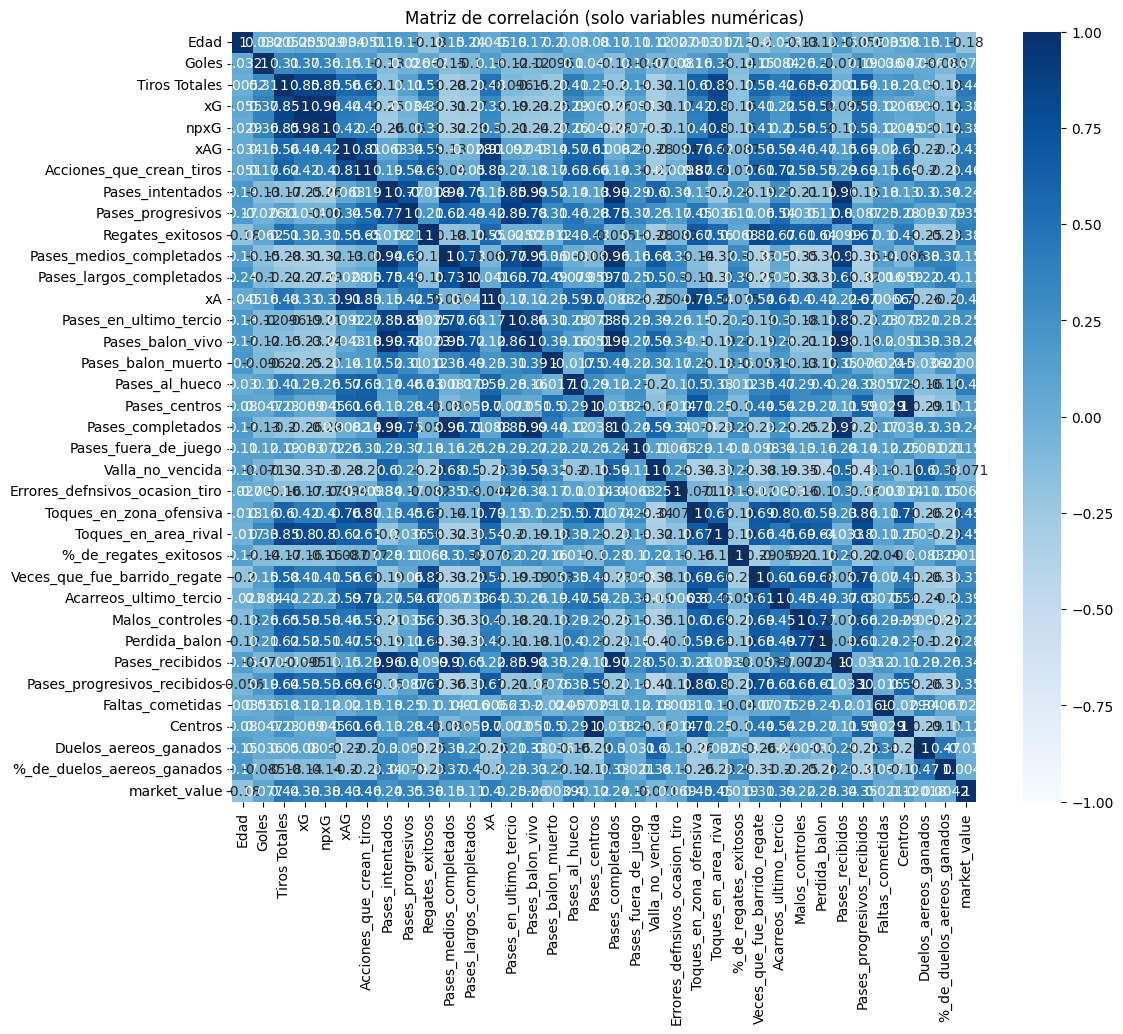

In [113]:
# Se copia el dataframe con el objetivo de quitar las variables no numericas temporalmente.
df_matriz = datos_entrenamiento.copy()
cols_excluir = ['Jugador', 'Nacionalidad', 'Posicion']
num_cols = df_matriz.drop(columns=[c for c in cols_excluir if c in df_matriz.columns], errors='ignore')\
             .select_dtypes(include=[np.number]).columns.tolist()
             
corr = df_matriz[num_cols].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="Blues", vmin=-1, vmax=1, annot=True)
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()

Dada la alta cantidad de variables, se hace difícil interpretar estos datos a simple vista. Así, se listaran solo los pares con una correlación mayor a 0.85.

In [114]:
import itertools

thr = 0.85
pairs = []
for a, b in itertools.combinations(num_cols, 2):
    r = corr.loc[a, b]
    if abs(r) > thr:
        pairs.append((a, b, r))

df_pairs = (pd.DataFrame(pairs, columns=['var_1', 'var_2', 'r'])
              .assign(abs_r=lambda d: d['r'].abs())
              .sort_values('abs_r', ascending=False))
df_pairs.head(20)

,var_1,var_2,r,abs_r
15,Pases_centros,Centros,1.000000,1.000000
13,Pases_balon_vivo,Pases_completados,0.992541,0.992541
5,Pases_intentados,Pases_completados,0.990263,0.990263
4,Pases_intentados,Pases_balon_vivo,0.989994,0.989994
14,Pases_balon_vivo,Pases_recibidos,0.978176,0.978176
0,xG,npxG,0.975974,0.975974
16,Pases_completados,Pases_recibidos,0.966938,0.966938
6,Pases_intentados,Pases_recibidos,0.962698,0.962698
9,Pases_medios_completados,Pases_completados,0.956347,0.956347
8,Pases_medios_completados,Pases_balon_vivo,0.948787,0.948787


De estos pares de variables altamente correlacionados entre si, nos deberemos quedar con una sola variable. Para ello, nos quedaremos con la variable que tenga más correlación con la variable objetivo (market_value).

In [126]:

df_full = datos_entrenamiento.copy()
target_col = 'market_value'
thr = 0.85                 

# Categóricas
cat_cols = [c for c in ['Nacionalidad', 'Posicion'] if c in df_full.columns]

#1) Columnas numéricas 
num_cols = (df_full.select_dtypes(include=[np.number])
                     .columns.drop(target_col, errors='ignore')
                     .tolist())

# Revisar si market_value es numérico
assert np.issubdtype(df_full[target_col].dtype, np.number), "market_value debe ser numérico"

# 2) Matriz de correlación y pares con |r|>thr 
corr = df_full[num_cols].corr(method='pearson')
pairs = []
for a, b in itertools.combinations(num_cols, 2):
    r = float(corr.loc[a, b])
    if abs(r) > thr:
        pairs.append((a, b, r))

df_pairs = (pd.DataFrame(pairs, columns=['var_1','var_2','r'])
              .assign(abs_r=lambda d: d['r'].abs())
              .sort_values('abs_r', ascending=False))

# 3) Regla para decidir qué quedarse en cada par
# Métrica principal: |corr| con el target
corr_y = (df_full[num_cols + [target_col]].corr()[target_col]
            .drop(target_col)
            .abs())

# Métrica secundaria (desempate): menor proporción de nulos
null_rate = df_full[num_cols].isna().mean()

to_drop = set()
for a, b, r in pairs:
    if a in to_drop or b in to_drop:
        continue
    ya, yb = corr_y.get(a, 0.0), corr_y.get(b, 0.0)
    if ya > yb:
        keep, drop = a, b
    elif yb > ya:
        keep, drop = b, a
    else:
        # Empate por corr_y: gana la de MENOS nulos; si aún empatan, alfabético
        na, nb = null_rate.get(a, 1.0), null_rate.get(b, 1.0)
        if na < nb:
            keep, drop = a, b
        elif nb < na:
            keep, drop = b, a
        else:
            keep, drop = sorted([a, b])[0], sorted([a, b])[1]
    to_drop.add(drop)

features_seleccionadas_num = [c for c in num_cols if c not in to_drop]

print(f"Numéricas seleccionadas: {len(features_seleccionadas_num)}")
print(f"Numéricas descartadas por alta correlación: {len(to_drop)}")
print("Ejemplo de descartadas:", sorted(list(to_drop))[:10])

# 4) Construir el DF para modelado (copia filtrada)
keep_cols = features_seleccionadas_num + cat_cols + [target_col]
df_model = df_full[keep_cols].copy()

print(df_full.shape, "->", df_model.shape)
df_model.head(3)


Numéricas seleccionadas: 26
Numéricas descartadas por alta correlación: 9
Ejemplo de descartadas: ['Pases_balon_vivo', 'Pases_centros', 'Pases_completados', 'Pases_en_ultimo_tercio', 'Pases_intentados', 'Pases_medios_completados', 'Toques_en_zona_ofensiva', 'npxG', 'xA']
(1346, 39) -> (1346, 29)


,Edad,Goles,Tiros Totales,xG,xAG,Acciones_que_crean_tiros,Pases_progresivos,Regates_exitosos,Pases_largos_completados,Pases_balon_muerto,...,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,Nacionalidad,Posicion,market_value
0,27.166667,0.000000,0.444444,0.016667,0.150000,2.638889,2.500000,0.333333,4.444444,12.611111,...,0.472222,28.861111,3.000000,1.055556,7.111111,0.555556,37.203571,es ESP,LB,6500000
1,26.694444,0.055556,0.444444,0.025000,0.094444,2.583333,4.138889,1.777778,1.333333,6.750000,...,0.611111,36.722222,4.638889,0.694444,2.111111,0.611111,44.304167,eng ENG,RB,24000000
2,21.476190,0.047619,0.238095,0.023810,0.004762,0.190476,1.000000,0.142857,1.047619,3.285714,...,0.190476,23.666667,0.142857,0.809524,0.047619,0.952381,61.108333,ci CIV,CB,10000000


Así, nos quedamos solo 29 variables exluyendo tambien el nombre del jugador, el cual no tiene relevancia para el modelo.

### Codificación One-Hot para Nacionalidad y Posición

Dado que la nacionalidad y la posición tienen relevancia para el modelo, es necesario codificar dichas variables categoricas antes de pasar a entrenar el modelo.

In [131]:
# === Entradas ===
target_col = 'market_value'
dfm = df_model.copy()

cat_cols = [c for c in ['Nacionalidad','Posicion'] if c in dfm.columns]
num_cols = [c for c in dfm.columns if c not in cat_cols + [target_col]]

# 1) Imputación mínima
dfm[cat_cols] = dfm[cat_cols].fillna('Desconocida').astype(str)

# 2) One-Hot (denso) con compatibilidad de versión
try:
    ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
except TypeError:
    # para scikit-learn antiguos
    ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)

ohe_arr  = ohe.fit_transform(dfm[cat_cols])
ohe_cols = ohe.get_feature_names_out(cat_cols)

ohe_df  = pd.DataFrame(ohe_arr, columns=ohe_cols, index=dfm.index)
num_df  = dfm[num_cols]

# 3) DataFrame codificado
df_model_ohe = pd.concat([num_df, ohe_df, dfm[[target_col]]], axis=1)

print("Shape original:", dfm.shape, "-> con OHE:", df_model_ohe.shape)
df_model_ohe.head(3)

Shape original: (1346, 29) -> con OHE: (1346, 134)


,Edad,Goles,Tiros Totales,xG,xAG,Acciones_que_crean_tiros,Pases_progresivos,Regates_exitosos,Pases_largos_completados,Pases_balon_muerto,...,Posicion_GK,Posicion_LB,Posicion_LM,Posicion_LW,Posicion_RB,Posicion_RM,Posicion_RW,"Posicion_RW,DM",Posicion_WB,market_value
0,27.166667,0.000000,0.444444,0.016667,0.150000,2.638889,2.500000,0.333333,4.444444,12.611111,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6500000
1,26.694444,0.055556,0.444444,0.025000,0.094444,2.583333,4.138889,1.777778,1.333333,6.750000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24000000
2,21.476190,0.047619,0.238095,0.023810,0.004762,0.190476,1.000000,0.142857,1.047619,3.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000


### Particionamiento del conjunto de datos entrenamiento y prueba

Una vez codificadas las variables categoricas, se puede hacer el particionamiento del conjunto de datos. Dadas las indicaciones del analísta, se optó por hacer un particionamiento de 75/25 para entrenamiento y prueba respectivamente.

In [132]:
target_col = 'market_value'
feat_cols_ohe = [c for c in df_model_ohe.columns if c != target_col]

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    df_model_ohe[feat_cols_ohe],
    df_model_ohe[target_col],
    test_size=0.25,
    random_state=42
)

X_train_ohe.shape, y_train_ohe.shape, X_test_ohe.shape, y_test_ohe.shape


((1009, 133), (1009,), (337, 133), (337,))

### Entrenamiento del primer modelo de regresión lineal

Con el particionamiento, podemos realizar el entrenamiento para el primer modelo.

In [136]:
lin = LinearRegression()
lin.fit(X_train_ohe, y_train_ohe)

pred_tr = lin.predict(X_train_ohe)
pred_te = lin.predict(X_test_ohe)

def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "R2": r2_score(y_true, y_pred),
    }

print("Linear  | Train:", {k: round(v,3) for k,v in metrics(y_train_ohe,pred_tr).items()})
print("Linear  | Test :", {k: round(v,3) for k,v in metrics(y_test_ohe, pred_te).items()})

Linear  | Train: {'MAE': 9756802.622, 'MSE': 199653137443815.06, 'RMSE': np.float64(14129866.859), 'R2': 0.587}
Linear  | Test : {'MAE': 10954560.811, 'MSE': 271758109273202.0, 'RMSE': np.float64(16485087.482), 'R2': 0.364}


Con las métricas obtenidas, se puede interpretar lo siguiente:

- MAE: en promedio, la predicción del modelo se desvía ~11 millones de euros del valor real de un jugador. Operativamente: si el modelo estima a un jugador en 35 M€, es razonable esperar que su valor real esté ~35 ± 11 M€ (24–46 M€) en un caso típico.
- RMSE: El error cuadrático medio es más sensible a errores grandes; por eso supera al MAE. Con este nivel, el modelo es útil para priorizar y negociar rangos de precio, pero no para fijar un precio exacto sin revisión analítica y deportiva. 
- R^2: Con las variables actuales, el modelo explica ~36% de la variabilidad de los precios en el conjunto de prueba; mejora sobre un modelo trivial (que tendría R^2 ≈ 0). Hay señal en las estadísticas, pero también factores fuera del conjunto.

### Análisis del error

In [ ]:
y_true = y_test_ohe
y_pred = pred_te 
err    = y_true - y_pred
abserr = np.abs(err)

print("Market value (test) – resumen")
display(y_true.describe(percentiles=[.25,.5,.75,.90,.95,.99]).to_frame("eur"))

print("Error absoluto – resumen")
display(pd.Series(abserr, name="abs_error_eur")
          .describe(percentiles=[.25,.5,.75,.90,.95,.99]).to_frame())

Market value (test) – resumen


,eur
count,3.370000e+02
mean,1.617596e+07
std,2.069899e+07
min,0.000000e+00
25%,3.000000e+06
50%,8.000000e+06
75%,2.200000e+07
90%,3.800000e+07
95%,5.600000e+07
99%,1.046000e+08


Error absoluto – resumen


,abs_error_eur
count,3.370000e+02
mean,1.095456e+07
std,1.233723e+07
min,1.874467e+04
25%,3.955943e+06
50%,8.233579e+06
75%,1.319101e+07
90%,2.065116e+07
95%,3.215971e+07
99%,6.218068e+07


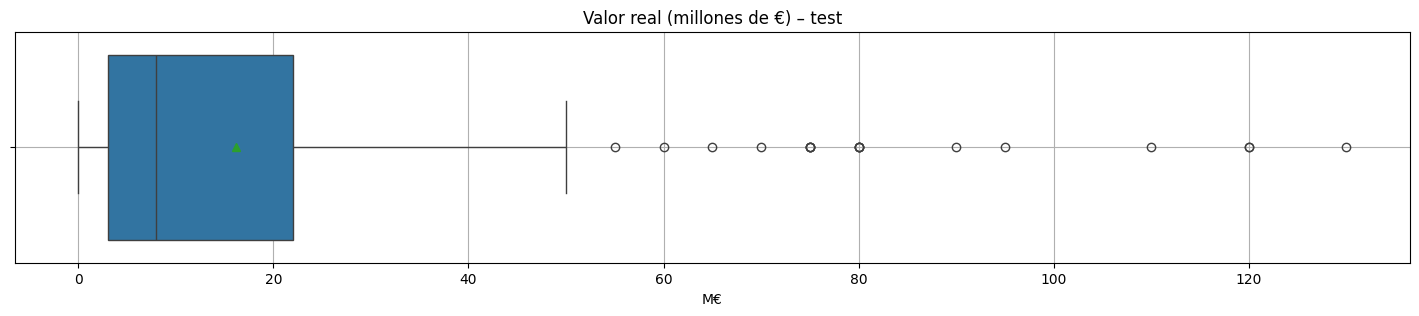

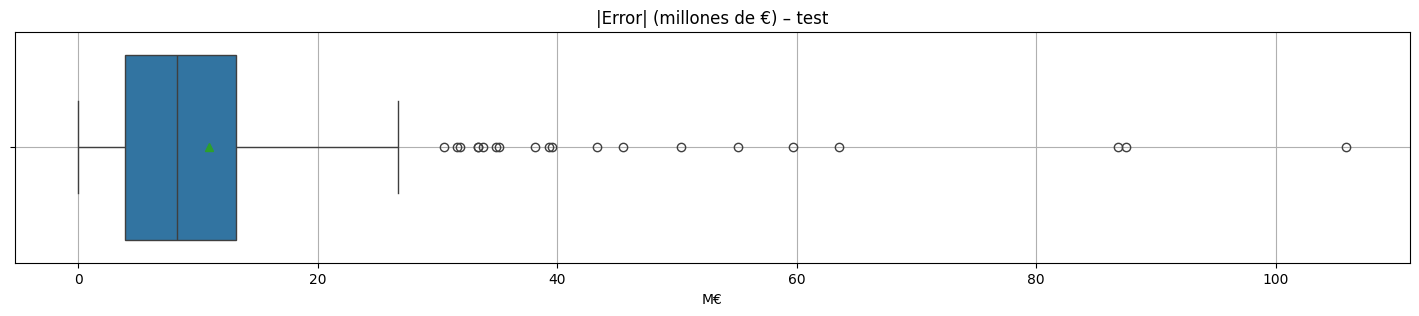

In [140]:
plt.figure(figsize=(18,3))
sns.boxplot(x=y_true/1e6, showmeans=True, orient="h")
plt.title("Valor real (millones de €) – test"); plt.xlabel("M€"); plt.grid(); plt.show()

plt.figure(figsize=(18,3))
sns.boxplot(x=abserr/1e6, showmeans=True, orient="h")
plt.title("|Error| (millones de €) – test"); plt.xlabel("M€"); plt.grid(); plt.show()

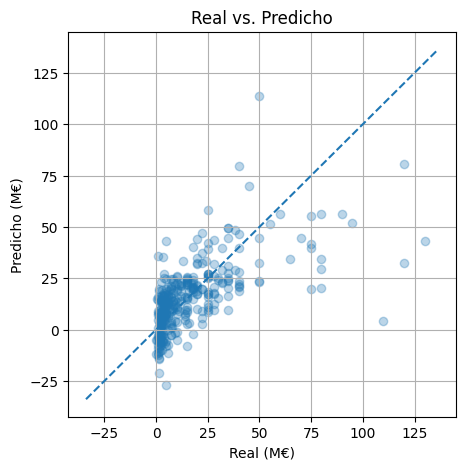

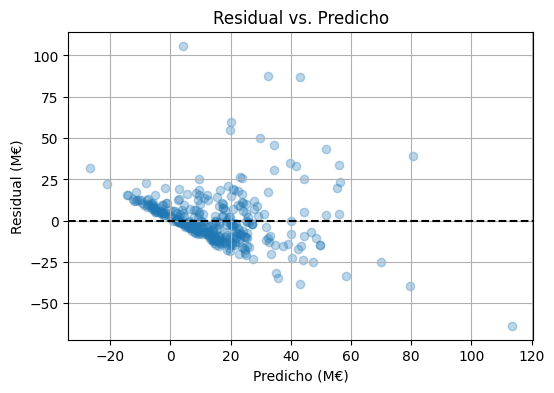

In [141]:
plt.figure(figsize=(5,5))
plt.scatter(y_true/1e6, y_pred/1e6, alpha=0.3)
lims = [min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])]
plt.plot(lims, lims, linestyle="--")  # línea y=x
plt.xlabel("Real (M€)"); plt.ylabel("Predicho (M€)"); plt.title("Real vs. Predicho"); plt.grid(); plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred/1e6, err/1e6, alpha=0.3)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Predicho (M€)"); plt.ylabel("Residual (M€)"); plt.title("Residual vs. Predicho"); plt.grid(); plt.show()